# Capstone Project :- Sentiment Analysis using NLP (Amazon Echo)

***Welcome to this new hands on project on amazon reviews sentiment analysis using Natural language Processing (NLP) techniques.***

*Artificial intelligence and machine learning based sentiment analysis is crucial for companies to automatically predict whether their customers are happy or not. This project is important and directly applicable to pretty much any company that has online presence.*

**In this project you have to build a machine learning model to analyze thousands of reviews to predict customer sentiment and your algorithms should be used to automatically detect customer sentiment from their reviews.**

## Task A :- Import Packages and Load Dataset

Write your Code :-

In [1]:
#Importing Packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='default', context='notebook', ticks=True, grid=False)

# Importing csv file into pandas dataframe
reviews_df = pd.read_csv(r'C:\Users\durga\OneDrive\Documents\Python Scripts\amazon_reviews.csv')

# printing the first 5 rows of the dataframe
reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


## Task B :- Understand Your Data
Write your Code :-

In [35]:
# Checking the number of non-null values in the dataframe
print(reviews_df.info(),'\n')

# Obtaining the Statistical summary of the dataframe
reviews_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   variation         3150 non-null   object
 2   verified_reviews  3150 non-null   object
 3   feedback          3150 non-null   int64 
 4   length            3150 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 123.2+ KB
None 



,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


**What did you understand ?**

**Type your Answer :-** There are no missing values. Looking at the mean row of summary statistics I can sense that on an average there are positive reviews for the product amazon echo, because rating is 4.46/5 and feeddack is almost close to 1.  

**Drop the 'date' column from the DataFrame and Ensure that the column has been succesfully dropped** 

Write your Code :-

In [3]:
reviews_df = reviews_df.drop(['date'], axis = 1)
reviews_df.head()

,rating,variation,verified_reviews,feedback
0,5,Charcoal Fabric,Love my Echo!,1
1,5,Charcoal Fabric,Loved it!,1
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,Charcoal Fabric,Music,1


## Task C :- Data Visualization backed with Data Exploration

**Plot the count plot for the ratings**

Write your Code :-

<Axes: xlabel='rating', ylabel='count'>

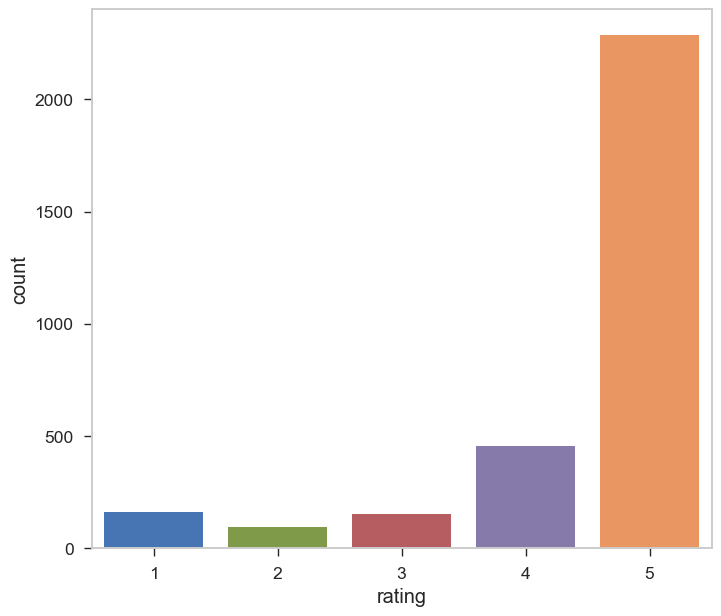

In [4]:
sns.countplot(x = reviews_df['rating'])

**1Q. What do you infer ?**

**Type your Answer :-** It is an amazing news that over 2000 customers gave 5 star rating and aroung 500 customers gave 4 star rating.

**2Q. Plot the countplot for the feedback column and Roughly how many positive and negative feedback are present in the dataset?**

Write your Code :-

<Axes: xlabel='feedback', ylabel='count'>

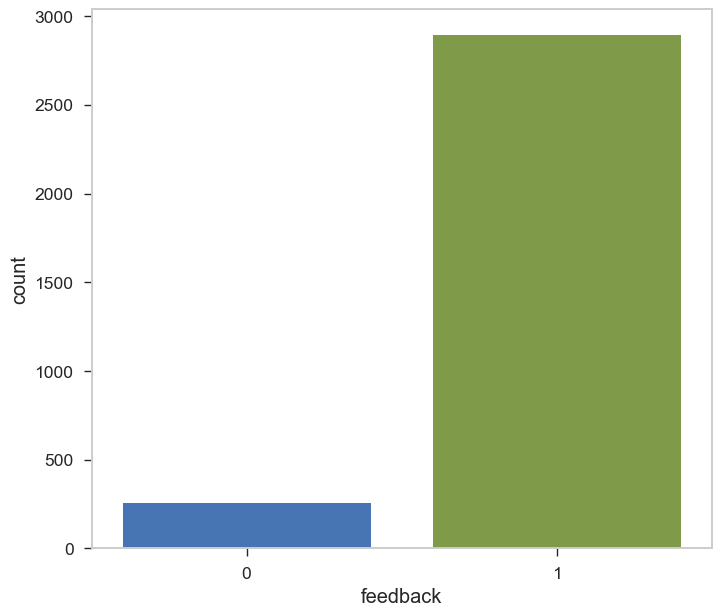

In [5]:
sns.countplot(x = reviews_df['feedback'])

**Type your Answer :-** Roughly there are 2800 positive feeb=dbacks and 250 negative feedbacks

 **Get the length of the verified_reviews column**
 
 90p0

In [6]:
reviews_df['length'] =  reviews_df['verified_reviews'].apply(len)
reviews_df

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


**Plot the histogram for the length**

Write your Code :-

<Axes: ylabel='Frequency'>

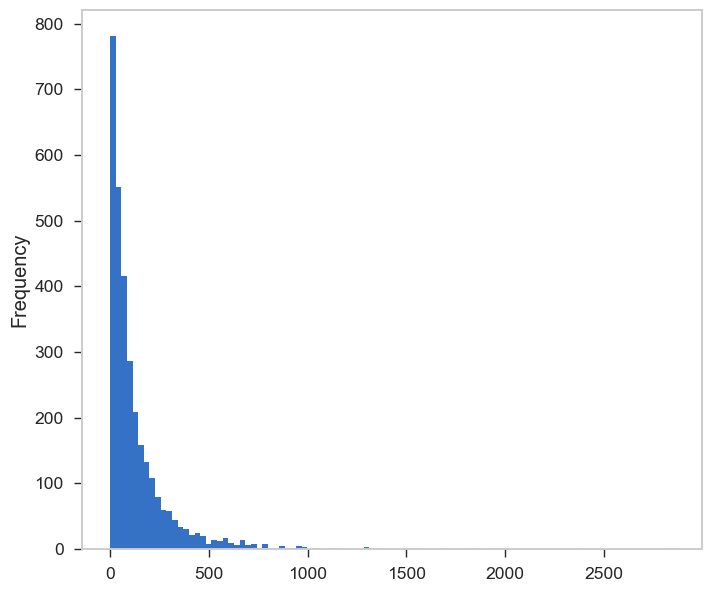

In [7]:
reviews_df['length'].plot(bins = 100, kind = 'hist')

**3Q. What do you infer ?**

**Type your Answer :-** I see lot of reviews are quite short in length 

**Get statistical summary now**

Write your Code :-

In [8]:
reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


**4Q. What do you infer ?**

**Type your Answer :-** I see on an average reviews are of length 132 and mamimum length of a review is 2851 characters.

**Get the row of the longest message**

Write your Code :-

In [9]:
reviews_df[reviews_df['length']==2851]

,rating,variation,verified_reviews,feedback,length
2016,5,Black Plus,Incredible piece of technology.I have this rig...,1,2851


**Get the row of the message with average length**

Write your Code :-

In [10]:
reviews_df[reviews_df['length'] == 132]['verified_reviews'].iloc[0]

'Nice. It works good.Some times is not easy to recognize your voice and you have to repeat several times, some time almost screaming.'

## Task D :- Plot the Word Cloud

**Obtain only the positive reviews**

Write your Code :-

In [11]:
positive = reviews_df[reviews_df['feedback']==1]
positive

,rating,variation,verified_reviews,feedback,length
0,5,Charcoal Fabric,Love my Echo!,1,13
1,5,Charcoal Fabric,Loved it!,1,9
2,4,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,Charcoal Fabric,Music,1,5
...,...,...,...,...,...
3145,5,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,White Dot,Only complaint I have is that the sound qualit...,1,380


**Obtain only the negative reviews**

Write your Code :-

In [12]:
negative = reviews_df[reviews_df['feedback']==0]
negative

,rating,variation,verified_reviews,feedback,length
46,2,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,Charcoal Fabric,Not much features.,0,18
162,1,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...
3047,1,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,Black Dot,The only negative we have on this product is t...,0,240
3091,1,Black Dot,I didn’t order it,0,17


**Get all positive reviews and Convert to list format**

Write your Code :-

In [13]:
sentences = positive['verified_reviews'].tolist()
len(sentences)

2893

**Join all positive reviews into one large string**

Write your Code :-

In [14]:
sentences_as_one_string = ' '.join(sentences)
sentences_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

**Import relevant packages and perform the word cloud**

Write your Code :-

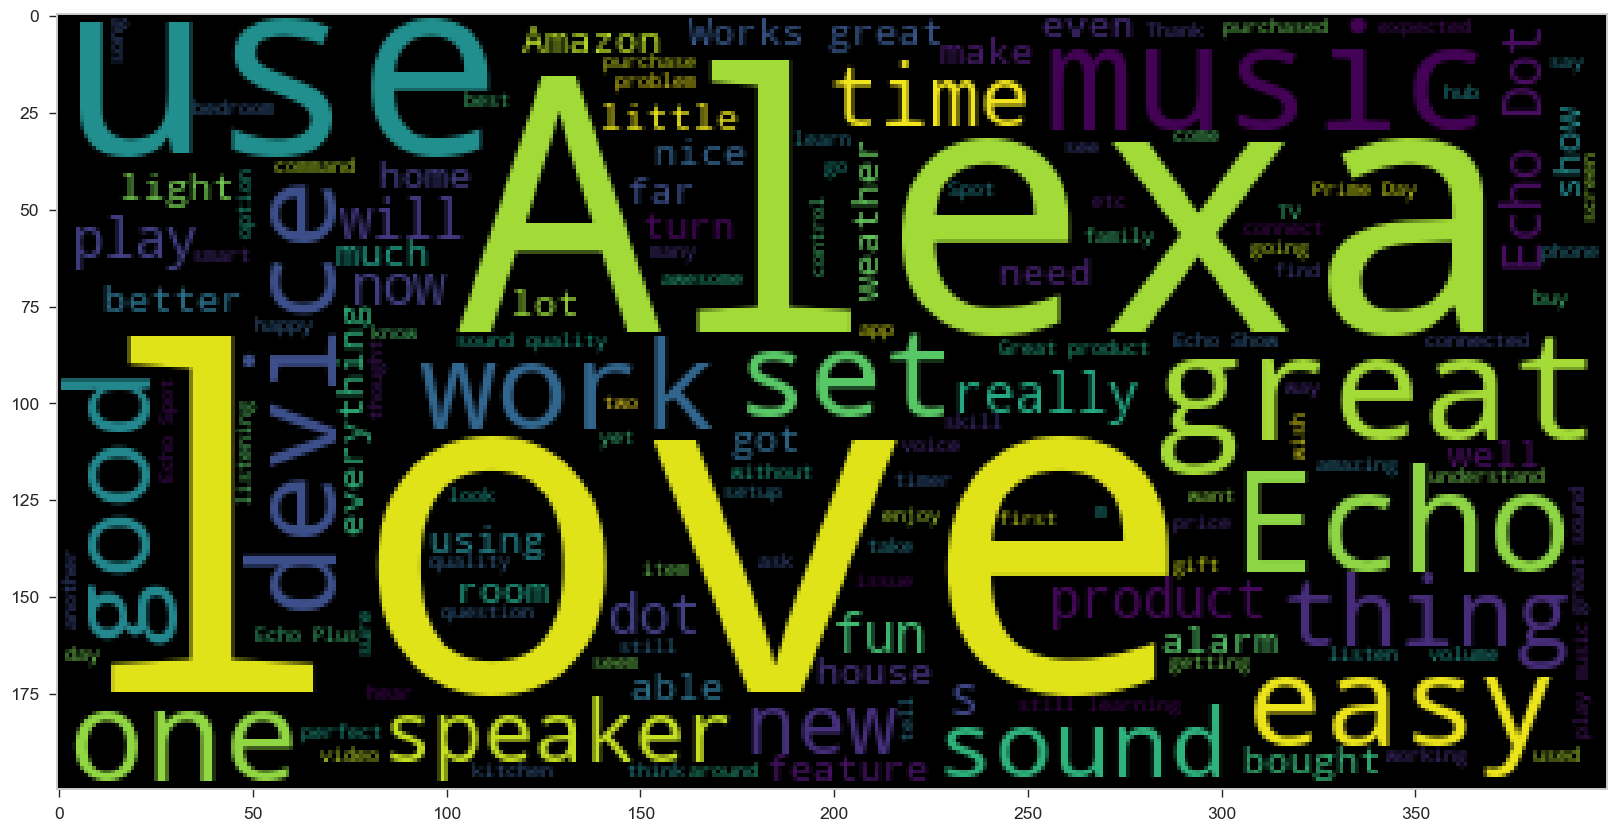

In [15]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

**What do you infer from the word cloud ?**

**Type your Answer :-** The most prominent words are "Echo," "Alexa," "great," "music," and "love." This suggests that the people who created the word cloud have positive feelings about Alexa and Echo devices, and that they often use them to play music. Other words that are relatively large include "amazing," "product," "time," "day," "weather," "everything," "Prime," and "play." These words suggest that people use Alexa and Echo devices for a variety of purposes, including getting information, controlling their smart home devices, and shopping. Some of the smaller words in the word cloud include "problem," "new," "phone," "screen," and "think." These words suggest that people may sometimes have problems with their Alexa or Echo devices, but that they generally think they are new and innovative products.

*Overall, the word cloud suggests that people have positive experiences with Alexa and Echo devices. They use them for a variety of purposes, and they find them to be helpful and enjoyable.*

**Plot the wordcloud of the "negative" dataframe** 

Write your Code :-

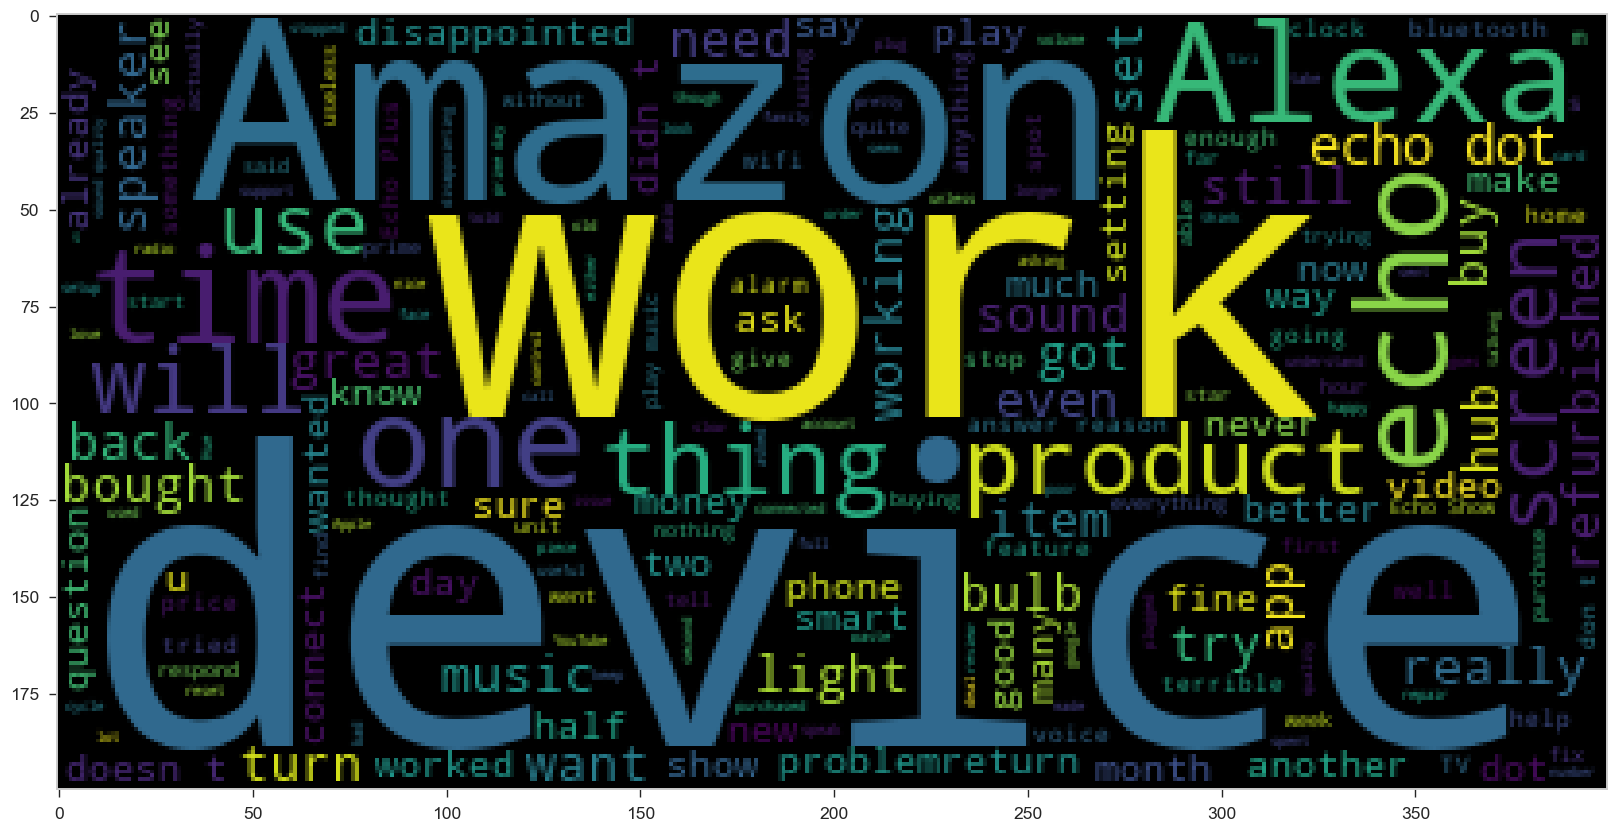

In [16]:
sentences = negative['verified_reviews'].tolist()
len(sentences)
sentences_as_one_string =" ".join(sentences)
plt.figure(figsize = (20,20))
plt.imshow(WordCloud().generate(sentences_as_one_string))

**What do you infer from the word cloud ?**

**Type your Answer :-** 

**Device Functionality Issues:** The largest words "device," "work," "doesn't," "terrible," and "reason" highlight fundamental problems with the device's performance and functionality. Users are expressing significant dissatisfaction.

**Attempted Troubleshooting :** Words like "try," "back," "even," "thought," and "month" suggest that users have tried various ways to resolve issues, but have been unsuccessful even after extended periods.

**Disappointment and Frustration :** Terms like "want," "need," "bought," "money," and "still" convey a sense of unmet expectations and frustration with the purchase. Users feel they've wasted money on a product that doesn't meet their needs.

**Specific Features and Concerns :** References to "speaker," "echo," "dot-screen," "video," "alarm," "hub," and "app" indicate issues with specific features or functionalities of the device.

**Refurbished Devices :** The word "refurbished" suggests that some users may have purchased devices that were previously returned, potentially contributing to higher rates of problems.

## Task E :- Text Data Cleaning

**Import the relevant module to remove punctuation and test it successsfully**

Write your Code :-

In [17]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

**Remove Punctuation**

Write your Code :-

In [18]:
Test = 'Hi! This is Shiva. As I do MBA, I specialize in Data Science. What is your Specialization ?'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['H',
 'i',
 ' ',
 'T',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'S',
 'h',
 'i',
 'v',
 'a',
 ' ',
 'A',
 's',
 ' ',
 'I',
 ' ',
 'd',
 'o',
 ' ',
 'M',
 'B',
 'A',
 ' ',
 'I',
 ' ',
 's',
 'p',
 'e',
 'c',
 'i',
 'a',
 'l',
 'i',
 'z',
 'e',
 ' ',
 'i',
 'n',
 ' ',
 'D',
 'a',
 't',
 'a',
 ' ',
 'S',
 'c',
 'i',
 'e',
 'n',
 'c',
 'e',
 ' ',
 'W',
 'h',
 'a',
 't',
 ' ',
 'i',
 's',
 ' ',
 'y',
 'o',
 'u',
 'r',
 ' ',
 'S',
 'p',
 'e',
 'c',
 'i',
 'a',
 'l',
 'i',
 'z',
 'a',
 't',
 'i',
 'o',
 'n',
 ' ']

**Get the cleaned up data**

Write your Code :-

In [19]:
Test_punc_removed_join = ''.join(Test_punc_removed)
Test_punc_removed_join

'Hi This is Shiva As I do MBA I specialize in Data Science What is your Specialization '

**Import relevant package to remove stopwords and test it successfully**

Write your Code :-

In [40]:
#Importing Natural Language Processing Tool kit

import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\durga\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**Test whether stopwords are removed or not**

Write your Code :-

In [21]:
Test_punc_removed_join = 'I have been enjoying these coding, programming and AI guided Projects on Rhyme and Coursera'
Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
Test_punc_removed_join_clean

['enjoying',
 'coding,',
 'programming',
 'AI',
 'guided',
 'Projects',
 'Rhyme',
 'Coursera']

**5Q. What do you infer ?**

**Type your Answer :-** Yes its working. Stopwords are removed and only uniqe words are displayed.

## Task F :- Perform Count Vectorization (Tokenization)

**Import relevant Package and Use a Class that is used to transform text documents into numerical vector representations and test it successfully**

Write your Code :-

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

sample_data = ['Hello World',
               'Hello Hello World',
               'Hello World World World',
               'Hello Hello World World World World']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

print(vectorizer.get_feature_names_out(),'\n')
print(X.toarray())

['hello' 'world'] 

[[1 1]
 [2 1]
 [1 3]
 [2 4]]


### Task F :- Create a Pipeline to Remove Punctuations, Stopwords and Perform Count Vectorization

**Define a pipeline to clean up all the messages**

Write your Code :-

In [23]:
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

**Test the newly added function**

Write your Code :-

In [24]:
reviews_df_clean = reviews_df['verified_reviews'].apply(message_cleaning)

**Show a sample original review**

Write your Code :-

In [25]:
print(reviews_df['verified_reviews'][5])

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


**Now Show up the cleaned up version**

Write your Code :-

In [26]:
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


**Now perform the count Vectorization on the uniqe words**

Write your Code :-

In [38]:
from sklearn.feature_extraction.text import CountVectorizer

# Initializing CountVectorizer with a custom analyzer
vectorizer = CountVectorizer(analyzer=message_cleaning)

# Fitting and transforming the text data:
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

# Getting feature names from the vectorizer
vectorizer.get_feature_names_out()

array(['072318', '1', '10', ..., '😬', '😳', '🤓'], dtype=object)

**Show tokenized version of entire text data.**

**Type your Answer :-**

In [28]:
# Printing the count vectorizer matrix as an array:
print(reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


**Create a DataFrame from the count vectorizer matrix**

Write your Code :-

In [29]:
X = pd.DataFrame(reviews_countvectorizer.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,5201,5202,5203,5204,5205,5206,5207,5208,5209,5210
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3146,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3147,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Extract the Target Variable y that is feedback**

Write your Code :-

In [30]:
y = reviews_df['feedback']
y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

**6Q. What is the Shape of X and y ?**

Write your Code :-

In [36]:
print(X.shape) #Input Data
print(y.shape) # Output Data

(3150, 5211)
(3150,)


## Task G :- Train and Test Naive Bayes Classifier Model 

Write your Code :-

In [32]:
# Importing the train_test_split function from the model_selection module in the sklearn library
from sklearn.model_selection import train_test_split

# Splitting the input features (X) and the target variable (y) into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Importing the MultinomialNB class from the naive_bayes module in the sklearn library. 
from sklearn.naive_bayes import MultinomialNB

# Creates an instance of the MultinomialNB classifier and assigning it to the variable NB_classifier
NB_classifier = MultinomialNB()

# Training (fits) the Naive Bayes classifier on the training data. 
NB_classifier.fit(X_train,y_train)

MultinomialNB()

**Predict the Test set results**

Write your Code :-

<Axes: >

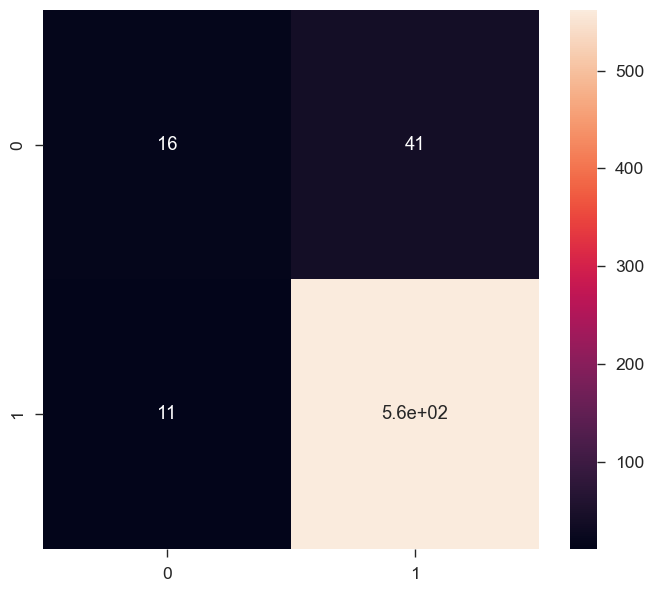

In [33]:
# Importing the classification_report and confusion_matrix functions from the metrics module in the sklearn library.
from sklearn.metrics import classification_report, confusion_matrix

# Making predictions on the testing features (X_test) abd Storing predicted values in the variable y_predict_test
y_predict_test = NB_classifier.predict(X_test)

# Calculating the confusion matrix using the actual target values (y_test) and the predicted values (y_predict_test)
cm = confusion_matrix(y_test, y_predict_test)

# Creating a heatmap visualization of the confusion matrix
sns.heatmap(cm, annot = True)

In [34]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.59      0.28      0.38        57
           1       0.93      0.98      0.96       573

    accuracy                           0.92       630
   macro avg       0.76      0.63      0.67       630
weighted avg       0.90      0.92      0.90       630



### 7Q. Try using another ML model of your own choice and compare it with Naive Bayes. Which shows up good performance ?

Write your Code :-

              precision    recall  f1-score   support

           0       0.92      0.42      0.58        57
           1       0.95      1.00      0.97       573

    accuracy                           0.94       630
   macro avg       0.93      0.71      0.77       630
weighted avg       0.94      0.94      0.93       630



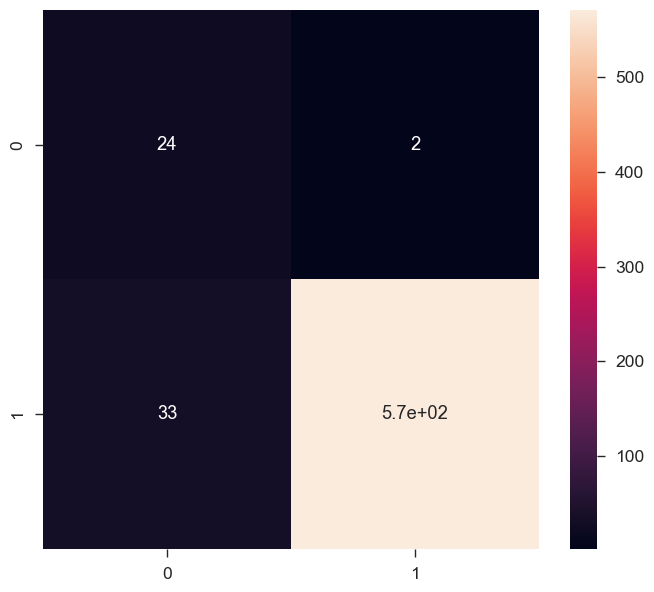

In [37]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

**Type your Answer :-** *It seems that performance of Logistic regression Model ***(94% accuracy)*** is better than Naive Bayes Classifier ***(90% accuracy)***. So I would go with Interpreting the performance of Logistic Regression Model*

The x-axis represents the predicted classes (0 for negative and 1 for positive reviews), and the y-axis represents the actual classes.

**The four quadrants of the matrix represent:**

**True Positives (TP):** These are the positive reviews that were correctly identified as positive by the model. In this case, there are approximately 570 true positives.

**True Negatives (TN):** These are the negative reviews that were correctly identified as negative. Here, there are 24 true negatives.

**False Positives (FP):** These are the negative reviews that were incorrectly identified as positive. There are 2 false positives in this case.

**False Negatives (FN):** These are the positive reviews that were incorrectly identified as negative. There are 33 false negatives.

***From this, we can see that the model has a high accuracy in predicting positive reviews (as indicated by the large number of TPs). However, it could be improved in terms of identifying negative reviews, as shown by the number of False Negatives***

* For class 0 (negative reviews), the precision is 0.92, this means that 92% of the reviews that the model predicted as negative were actually negative. and for class 1 (positive reviews), it's 0.95,  This means that 95% of the reviews that the model predicted as positive were actually positive. 

* For class 0, the recall is 0.42, For class 0, the recall is 42%. This means that the model correctly identified 42% of all actual negative reviews. For class 1, it's 1.00, For class 1, the recall is 100%. This means that the model correctly identified all the actual positive reviews.

* For class 0, the F1 score is 0.58, this means that considering both precision and recall, the model’s accuracy for identifying negative reviews is 58%. For class 1 it's 0.97, this means that considering both precision and recall, the model’s accuracy for identifying positive reviews is 97%.

***The overall accuracy of the model is 94%, which means the model correctly identified 94% of all reviews. Macro-average F1 score of 77% means that on average, considering both positive and negative reviews, the model’s accuracy is 77%.***
